<h1><center><bold>ImageMining:
Atelier N°3: Clustering</bold>

## Abdelazyz RKHISS
    
    
    
Rkhissabdelazyz781@gmail.com</center></h1>

<div>
    <img src='moi.jpg' hight='400' style ="text-align : right">
</div>




# Table des matières :
<h5>

#### segmenter une base d'images :

[1 - la base des images de deux classes](#-3)</br>
[1 - segmentation de la base](#-2)</br>
</br></br>


[1 - la base contenant quatre classes](#-1)</br>
[1 - segmentation de la base](#0)</br>
</br></br>

#### segmenter image en regions:
    
[1 - Importation des données (images)](#1)</br>


 
[2.1 - Build Algorithme KMEANS SKLEARN](#2)</br> 

[2.2 - visualisation mask original et mask generer KMEANS](#3)</br>

[2.3 - Kmeans Score](#4)</br>

[2.4 - build Gaussien Mexiture GMM ](#5)</br>

[2.5 - visualisation mask original et mask generer GMM ](#6)</br>

[2.3 - GMM Score](#7)</br>
</br>
</br>

[3.1 - utilisation de Calssification supervisé pour le Clustering ](#8)</br>

</br></br>
</br></br>

</h5>

<a name='-3'> </a>
# la base des images en deux classes

### pré-traitement sur les données ::

### importer VGG16

### extraction de vecteur caractéristique de chaque image

### prédire les classes des photos avec KMEANS


In [10]:
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage
from skimage.transform import rescale, resize, downscale_local_mean

from keras.models import Model

# load all images in a directory
loadeded_CL2 = list()
filenames = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//DB Clustring//2Classes'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    filenames.append(filename)
    img_data = resize(img_data, (224,224,3))
    # store loaded image
    loadeded_CL2.append(img_data)
    

In [2]:
X = np.stack( loadeded_CL2, axis=0 )

In [3]:
X.shape

(200, 224, 224, 3)

In [4]:
from keras.applications.vgg16 import VGG16

In [5]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
feature = model.predict(X)

In [8]:
feature /= np.linalg.norm(feature)  # Normalize the feature

In [9]:
feature.shape

(200, 4096)

### Si travaillons avec des données et que npus avons beaucoup de variables à prendre en compte (dans notre cas 4096), l'ACP nous permet de réduire le nombre de variables tout en préservant autant d'informations que possible de l'ensemble original.

<a name='-2'> </a>

# Segmenter avec KMEANS

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feature)
x = pca.transform(feature)

In [12]:
x.shape

(200, 100)

In [13]:
KMEANS = KMeans(n_clusters=2, random_state=0)

In [14]:
KMEANS.fit(x)

KMeans(n_clusters=2, random_state=0)

In [15]:
labels = KMEANS.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [16]:
groups = {}
for file, cluster in zip(filenames, labels):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [18]:
groups.keys()

dict_keys([1, 0])

In [17]:
predict0 = list()
predict1 = list()

for i in range(len(groups[0])):
    predict0.append([groups[0][i], 0])
    
for j in range(len(groups[1])):
    predict1.append([groups[1][i], 1])

In [19]:
predict1

[['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],
 ['350095.jpg', 1],


In [20]:
predict0

[['425000.jpg', 0],
 ['425001.jpg', 0],
 ['425002.jpg', 0],
 ['425003.jpg', 0],
 ['425004.jpg', 0],
 ['425005.jpg', 0],
 ['425006.jpg', 0],
 ['425007.jpg', 0],
 ['425008.jpg', 0],
 ['425009.jpg', 0],
 ['425010.jpg', 0],
 ['425011.jpg', 0],
 ['425012.jpg', 0],
 ['425013.jpg', 0],
 ['425014.jpg', 0],
 ['425015.jpg', 0],
 ['425016.jpg', 0],
 ['425017.jpg', 0],
 ['425018.jpg', 0],
 ['425019.jpg', 0],
 ['425020.jpg', 0],
 ['425021.jpg', 0],
 ['425022.jpg', 0],
 ['425023.jpg', 0],
 ['425024.jpg', 0],
 ['425025.jpg', 0],
 ['425026.jpg', 0],
 ['425028.jpg', 0],
 ['425029.jpg', 0],
 ['425030.jpg', 0],
 ['425031.jpg', 0],
 ['425032.jpg', 0],
 ['425033.jpg', 0],
 ['425035.jpg', 0],
 ['425037.jpg', 0],
 ['425038.jpg', 0],
 ['425039.jpg', 0],
 ['425040.jpg', 0],
 ['425041.jpg', 0],
 ['425042.jpg', 0],
 ['425043.jpg', 0],
 ['425044.jpg', 0],
 ['425045.jpg', 0],
 ['425046.jpg', 0],
 ['425047.jpg', 0],
 ['425048.jpg', 0],
 ['425049.jpg', 0],
 ['425050.jpg', 0],
 ['425051.jpg', 0],
 ['425052.jpg', 0],


<a name='-1'> </a>


# la base contenant quatre classes

In [21]:
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage
from skimage.transform import rescale, resize, downscale_local_mean

from keras.models import Model

# load all images in a directory
loadeded_CL4 = list()
filenames = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//DB Clustring//4Classes'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    filenames.append(filename)
    img_data = resize(img_data, (224,224,3))
    # store loaded image
    loadeded_CL4.append(img_data)
    

In [22]:
X4 = np.stack( loadeded_CL4, axis=0 )

In [23]:
X4.shape

(400, 224, 224, 3)

In [24]:
predict_C4 = model.predict(X4)

In [25]:
predict_C4 /= np.linalg.norm(predict_C4)

In [56]:
predict_C4.shape

(400, 4096)

In [57]:
pca = PCA(n_components=100, random_state=22)
pca.fit(predict_C4)
C4 = pca.transform(predict_C4)

In [58]:
C4.shape

(400, 100)

<a name='0'> </a>

# Segmentation De la base avec KMEANS

In [59]:
KMEANS = KMeans(n_clusters=4, random_state=0)

In [60]:
KMEANS.fit(C4)

KMeans(n_clusters=4, random_state=0)

In [61]:
KMEANS.predict(C4)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 1, 3, 1,
       1, 1, 2, 3, 2, 2, 3, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,

In [62]:
groups = {}
for file, cluster in zip(filenames,KMEANS.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [63]:
groups.keys()

dict_keys([2, 1, 0, 3])

In [67]:
predict0 = list()
predict1 = list()
predict2 = list()
predict3 = list()


for i in range(len(groups[0])):
    predict0.append([groups[0][i], 0])
    
for i in range(len(groups[1])):
    predict1.append([groups[1][i], 1])
    
for i in range(len(groups[2])):
    predict2.append([groups[2][i], 2])
    
for i in range(len(groups[3])):
    predict3.append([groups[3][i], 3])

In [71]:
predict0

[['425002.jpg', 0],
 ['425003.jpg', 0],
 ['425004.jpg', 0],
 ['425005.jpg', 0],
 ['425009.jpg', 0],
 ['425010.jpg', 0],
 ['425011.jpg', 0],
 ['425015.jpg', 0],
 ['425016.jpg', 0],
 ['425017.jpg', 0],
 ['425018.jpg', 0],
 ['425022.jpg', 0],
 ['425023.jpg', 0],
 ['425024.jpg', 0],
 ['425025.jpg', 0],
 ['425039.jpg', 0],
 ['425041.jpg', 0],
 ['425044.jpg', 0],
 ['425045.jpg', 0],
 ['425046.jpg', 0],
 ['425047.jpg', 0],
 ['425048.jpg', 0],
 ['425050.jpg', 0],
 ['425051.jpg', 0],
 ['425052.jpg', 0],
 ['425053.jpg', 0],
 ['425054.jpg', 0],
 ['425056.jpg', 0],
 ['425057.jpg', 0],
 ['425058.jpg', 0],
 ['425059.jpg', 0],
 ['425060.jpg', 0],
 ['425061.jpg', 0],
 ['425063.jpg', 0],
 ['425064.jpg', 0],
 ['425065.jpg', 0],
 ['425066.jpg', 0],
 ['425070.jpg', 0],
 ['425071.jpg', 0],
 ['425072.jpg', 0],
 ['425073.jpg', 0],
 ['425075.jpg', 0],
 ['425077.jpg', 0],
 ['425083.jpg', 0],
 ['425084.jpg', 0],
 ['425085.jpg', 0],
 ['425086.jpg', 0],
 ['425087.jpg', 0],
 ['425090.jpg', 0],
 ['425091.jpg', 0],


In [72]:
predict1

[['425000.jpg', 1],
 ['425001.jpg', 1],
 ['425006.jpg', 1],
 ['425007.jpg', 1],
 ['425008.jpg', 1],
 ['425012.jpg', 1],
 ['425013.jpg', 1],
 ['425014.jpg', 1],
 ['425019.jpg', 1],
 ['425020.jpg', 1],
 ['425021.jpg', 1],
 ['425026.jpg', 1],
 ['425029.jpg', 1],
 ['425031.jpg', 1],
 ['425032.jpg', 1],
 ['425033.jpg', 1],
 ['425040.jpg', 1],
 ['425042.jpg', 1],
 ['425043.jpg', 1],
 ['425049.jpg', 1],
 ['425055.jpg', 1],
 ['425062.jpg', 1],
 ['425067.jpg', 1],
 ['425068.jpg', 1],
 ['425069.jpg', 1],
 ['425074.jpg', 1],
 ['425076.jpg', 1],
 ['425078.jpg', 1],
 ['425080.jpg', 1],
 ['425081.jpg', 1],
 ['425082.jpg', 1],
 ['425088.jpg', 1],
 ['425089.jpg', 1],
 ['425095.jpg', 1],
 ['655000.jpg', 1],
 ['655001.jpg', 1],
 ['655002.jpg', 1],
 ['655003.jpg', 1],
 ['655004.jpg', 1],
 ['655005.jpg', 1],
 ['655006.jpg', 1],
 ['655007.jpg', 1],
 ['655008.jpg', 1],
 ['655009.jpg', 1],
 ['655010.jpg', 1],
 ['655011.jpg', 1],
 ['655012.jpg', 1],
 ['655013.jpg', 1],
 ['655014.jpg', 1],
 ['655015.jpg', 1],


In [73]:
predict2

[['350000.jpg', 2],
 ['350001.jpg', 2],
 ['350002.jpg', 2],
 ['350003.jpg', 2],
 ['350004.jpg', 2],
 ['350005.jpg', 2],
 ['350006.jpg', 2],
 ['350007.jpg', 2],
 ['350008.jpg', 2],
 ['350009.jpg', 2],
 ['350010.jpg', 2],
 ['350011.jpg', 2],
 ['350012.jpg', 2],
 ['350013.jpg', 2],
 ['350014.jpg', 2],
 ['350015.jpg', 2],
 ['350016.jpg', 2],
 ['350017.jpg', 2],
 ['350018.jpg', 2],
 ['350019.jpg', 2],
 ['350020.jpg', 2],
 ['350021.jpg', 2],
 ['350022.jpg', 2],
 ['350023.jpg', 2],
 ['350024.jpg', 2],
 ['350025.jpg', 2],
 ['350026.jpg', 2],
 ['350027.jpg', 2],
 ['350028.jpg', 2],
 ['350029.jpg', 2],
 ['350030.jpg', 2],
 ['350031.jpg', 2],
 ['350032.jpg', 2],
 ['350033.jpg', 2],
 ['350034.jpg', 2],
 ['350035.jpg', 2],
 ['350036.jpg', 2],
 ['350037.jpg', 2],
 ['350038.jpg', 2],
 ['350039.jpg', 2],
 ['350040.jpg', 2],
 ['350041.jpg', 2],
 ['350042.jpg', 2],
 ['350043.jpg', 2],
 ['350044.jpg', 2],
 ['350045.jpg', 2],
 ['350046.jpg', 2],
 ['350047.jpg', 2],
 ['350048.jpg', 2],
 ['350049.jpg', 2],


In [74]:
predict3

[['425028.jpg', 3],
 ['425030.jpg', 3],
 ['425035.jpg', 3],
 ['425038.jpg', 3],
 ['425079.jpg', 3],
 ['581000.jpg', 3],
 ['581001.jpg', 3],
 ['581002.jpg', 3],
 ['581003.jpg', 3],
 ['581004.jpg', 3],
 ['581005.jpg', 3],
 ['581006.jpg', 3],
 ['581007.jpg', 3],
 ['581008.jpg', 3],
 ['581009.jpg', 3],
 ['581010.jpg', 3],
 ['581011.jpg', 3],
 ['581012.jpg', 3],
 ['581013.jpg', 3],
 ['581014.jpg', 3],
 ['581015.jpg', 3],
 ['581016.jpg', 3],
 ['581017.jpg', 3],
 ['581018.jpg', 3],
 ['581019.jpg', 3],
 ['581020.jpg', 3],
 ['581021.jpg', 3],
 ['581022.jpg', 3],
 ['581023.jpg', 3],
 ['581024.jpg', 3],
 ['581025.jpg', 3],
 ['581026.jpg', 3],
 ['581027.jpg', 3],
 ['581028.jpg', 3],
 ['581029.jpg', 3],
 ['581030.jpg', 3],
 ['581031.jpg', 3],
 ['581032.jpg', 3],
 ['581033.jpg', 3],
 ['581034.jpg', 3],
 ['581035.jpg', 3],
 ['581036.jpg', 3],
 ['581037.jpg', 3],
 ['581038.jpg', 3],
 ['581039.jpg', 3],
 ['581040.jpg', 3],
 ['581041.jpg', 3],
 ['581042.jpg', 3],
 ['581043.jpg', 3],
 ['581044.jpg', 3],


.
.
# Segmentation de Contenue ::




<a name='1'> </a>

# images import

### segmentation des images , clustering en GMM et KMEANS

In [75]:
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//image clustring'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
    print(' %s %s ' % (filename, img_data.shape))

 1.bmp (337, 336, 3) 
 1_GT.bmp (337, 336, 3) 
 2.bmp (337, 336, 3) 
 2_GT.bmp (337, 336, 3) 
 test.bmp (337, 336, 3) 


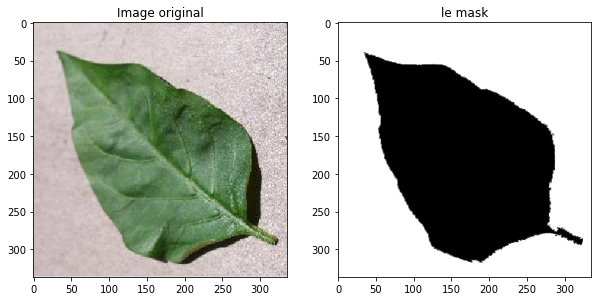

In [76]:
image1 = loaded_images[0]
mask1 = loaded_images[1]

fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(image1);
ax[0].title.set_text('Image original')
ax[1].imshow(mask1);
ax[1].title.set_text('le mask')

<a name='2'> </a>
# Kmeans Algorithme

In [13]:
from sklearn.cluster import KMeans
import numpy as np
from skimage import color

In [14]:
imgGray = color.rgb2gray(image1)

In [15]:
original_shape = imgGray.shape

In [80]:
model_kmeans = KMeans(n_clusters=2, random_state=0)

In [81]:
vecteur_img = imgGray.reshape(-1, 1)

In [82]:
model_kmeans.fit(vecteur_img)

KMeans(n_clusters=2, random_state=0)

In [83]:
vecteur_predictedKMEANS = model_kmeans.predict(vecteur_img)

In [84]:
img_segmentedKMEANS = vecteur_predictedKMEANS.reshape(original_shape)

In [85]:
img_segmentedKMEANS = img_segmentedKMEANS*255

Text(0.5, 1.0, 'le mask générer par Kmeans')

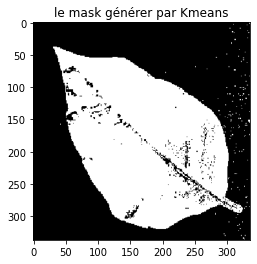

In [86]:
plt.imshow(img_segmentedKMEANS, cmap='gray')
plt.title("le mask générer par Kmeans")

Text(0.5, 1.0, 'le mask original')

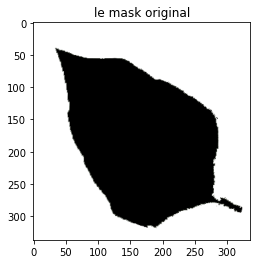

In [87]:
plt.imshow(mask1, cmap='gray')
plt.title('le mask original')

<a name='3'> </a>
### convertir mask original et afficher avec le mask generer

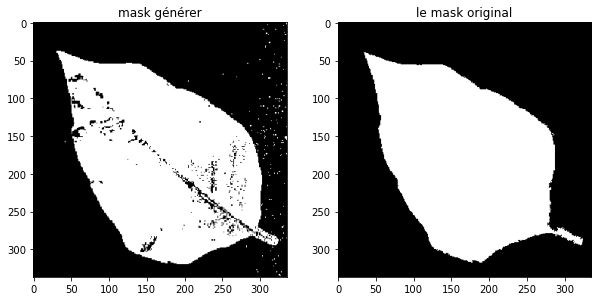

In [88]:
maskimg1 = loaded_images[1]

maskimg1 = color.rgb2gray(maskimg1)


for i in range(maskimg1.shape[0]):
    for j in range(maskimg1.shape[1]):
        if maskimg1[i][j]<=0.5:
            maskimg1[i][j]=1
        elif maskimg1[i][j]>0.5:
            maskimg1[i][j]=0
    
    
vecteur_original = maskimg1.flatten()

maskimg1 = vecteur_original.reshape(original_shape)


fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_segmentedKMEANS, cmap='gray')
ax[0].title.set_text('mask générer')
ax[1].imshow(maskimg1, cmap='gray')
ax[1].title.set_text('le mask original')

<a name='4'> </a>
# Kmeans SCORE for this picture

In [12]:
import sklearn.metrics as metric

In [90]:
metric.accuracy_score(vecteur_original, vecteur_predictedKMEANS)

0.9414741415854175


..


..
<a name='5'> </a>
# GMM Algorithme

In [91]:
import sklearn.mixture as Gm

In [92]:
modelGMM = Gm.GaussianMixture(2, covariance_type='tied')

In [93]:
modelGMM.fit(vecteur_img)

GaussianMixture(covariance_type='tied', n_components=2)

In [94]:
vecteur_predictedGMM = modelGMM.predict(vecteur_img)

In [95]:
img_segmentedGMM = vecteur_predictedGMM.reshape(original_shape)

In [96]:
img_segmentedGMM = img_segmentedGMM*255

Text(0.5, 1.0, 'le maske générer par GMM')

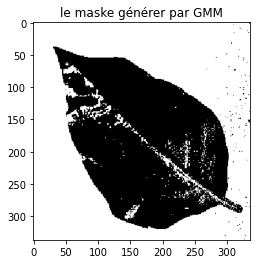

In [97]:
plt.imshow(img_segmentedGMM, cmap='gray')
plt.title("le maske générer par GMM")

.

<a name='6'> </a>
# Visualisation mask original et generer par GMM

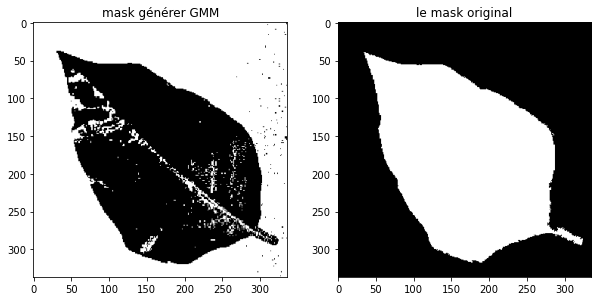

In [98]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_segmentedGMM, cmap='gray')
ax[0].title.set_text('mask générer GMM')
ax[1].imshow(maskimg1, cmap='gray')
ax[1].title.set_text('le mask original')

<a name='7'> </a>

# Score GMM

In [99]:
vecteur_original = maskimg1.flatten()

In [241]:
metric.accuracy_score(vecteur_original, vecteur_predictedGMM)

0.93311078140455

<a name = '8'> </a>

# utilisation de Calssification supervisé pour le but de Clustering

#### Importer chaque image et la segmentation comme etiquette

In [6]:
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//image clustring'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
    print(' %s %s ' % (filename, img_data.shape))

 1.bmp (337, 336, 3) 
 1_GT.bmp (337, 336, 3) 
 2.bmp (337, 336, 3) 
 2_GT.bmp (337, 336, 3) 
 test.bmp (337, 336, 3) 


### chaque image avec son MASK

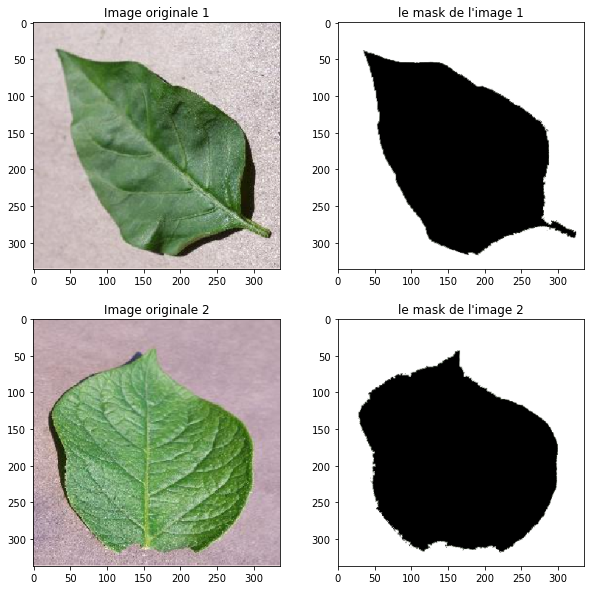

In [7]:
image1 = loaded_images[0]
mask1 = loaded_images[1]

image2 = loaded_images[2]
mask2 = loaded_images[3]

image_test = loaded_images[4]

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0][0].imshow(image1);
ax[0][0].title.set_text('Image originale 1')
ax[0][1].imshow(mask1);
ax[0][1].title.set_text('le mask de l\'image 1')

ax[1][0].imshow(image2);
ax[1][0].title.set_text('Image originale 2')
ax[1][1].imshow(mask2);                 
ax[1][1].title.set_text('le mask de l\'image 2')

### L'image de Test

Text(0.5, 1.0, 'image de test')

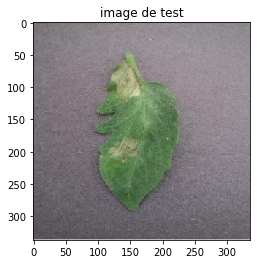

In [8]:
plt.imshow(image_test)
plt.title('image de test')

## pré-traitements sur les images :

In [16]:
img1 = color.rgb2gray(image1)
img2 = color.rgb2gray(image2)
test_image  = color.rgb2gray(image_test)

In [17]:
vect_img1 = img1.flatten()
dist_mean = np.subtract(vect_img1, np.mean(vect_img1))
dist_max  = np.subtract(vect_img1, np.max(vect_img1))


In [18]:
vectgenerale_img1 = np.vstack((vect_img1, dist_mean, dist_max)).T

vectgenerale_img1.shape

(113232, 3)

In [19]:
vect_img2 = img2.flatten()
dist_mean = np.subtract(vect_img2, np.mean(vect_img2))
dist_max  = np.subtract(vect_img2, np.max(vect_img2))

In [20]:
vectgenerale_img2 = np.vstack((vect_img2, dist_mean, dist_max)).T

vectgenerale_img2.shape

(113232, 3)

In [21]:
X = np.vstack((vectgenerale_img1, vectgenerale_img2))
X.shape

(226464, 3)

In [22]:
mask_img1 = color.rgb2gray(mask1)
vect_mask1 = mask_img1.flatten()

for i in range(vect_mask1.shape[0]):
    if vect_mask1[i]>0.5:
        vect_mask1[i] = 1
    else:
        vect_mask1[i] = 0

In [23]:
vect_mask1.shape

(113232,)

In [24]:
mask_img2 = color.rgb2gray(mask2)
vect_mask2 = mask_img2.flatten()

for i in range(vect_mask2.shape[0]):
    if vect_mask2[i]>0.5:
        vect_mask2[i] = 1
    else:
        vect_mask2[i] = 0

In [25]:
vect_mask2.shape

(113232,)

In [26]:
Y = np.hstack((vect_mask1, vect_mask2))
Y.shape

(226464,)

<a name='9'></a>

</br></br>

# SVM Pour classification

In [27]:
import sklearn.svm as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [30]:
model_svm = sv.SVC()

In [ ]:
model_svm.fit(X, Y)

In [ ]:
# pré-traitement de l'image de test pr SVM
vect_img_test = test_image.flatten()
dist_mean = np.subtract(vect_img_test, np.mean(vect_img_test))
dist_max  = np.subtract(vect_img_test, np.max(vect_img_test))


In [ ]:
vectgenerale_img_test = np.vstack((vect_img_test, dist_mean, dist_max)).T

vectgenerale_img_test.shape

In [ ]:
Ypred = model_svm.predict()